<a href="https://colab.research.google.com/github/spierscaleb004/4410-HW/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      age     sex     bmi      bp      s1      s2      s3      s4      s5  \
0  0.0381  0.0507  0.0617  0.0219 -0.0442 -0.0348 -0.0434 -0.0026  0.0199   
1 -0.0019 -0.0446 -0.0515 -0.0263 -0.0084 -0.0192  0.0744 -0.0395 -0.0683   
2  0.0853  0.0507  0.0445 -0.0057 -0.0456 -0.0342 -0.0324 -0.0026  0.0029   
3 -0.0891 -0.0446 -0.0116 -0.0367  0.0122  0.0250 -0.0360  0.0343  0.0227   
4  0.0054 -0.0446 -0.0364  0.0219  0.0039  0.0156  0.0081 -0.0026 -0.0320   

       s6  DiseaseProgression  
0 -0.0176               151.0  
1 -0.0922                75.0  
2 -0.0259               141.0  
3 -0.0094               206.0  
4 -0.0466               135.0  
              age         sex         bmi          bp          s1          s2  \
count  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02  4.4200e+02   
mean  -2.5118e-19  1.2308e-17 -2.2456e-16 -4.7976e-17 -1.3815e-17  3.9184e-17   
std    4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02  4.7619e-02   
min   -1.0723e-01 -4.

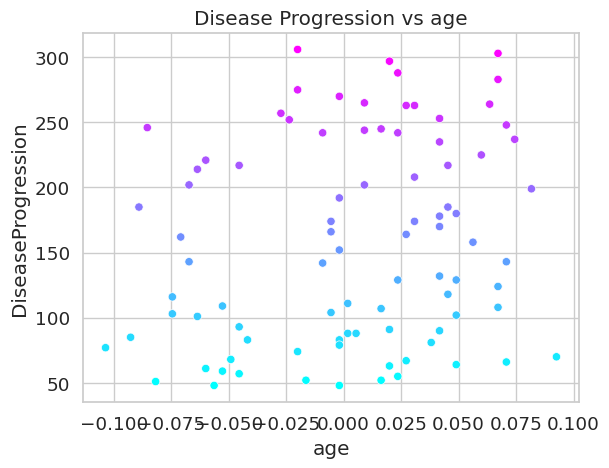

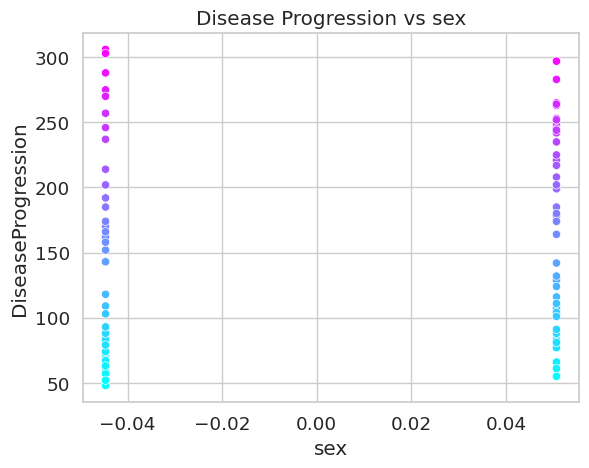

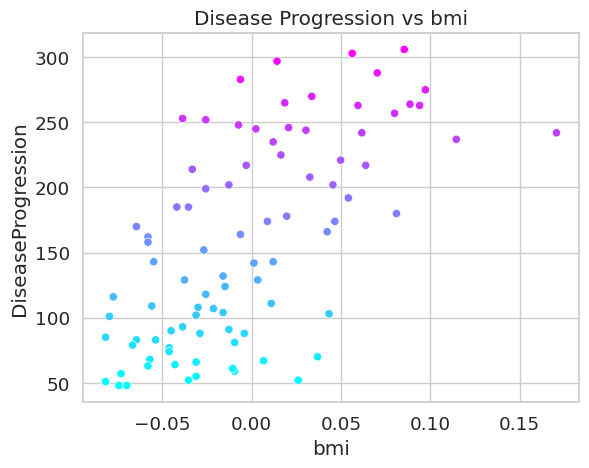

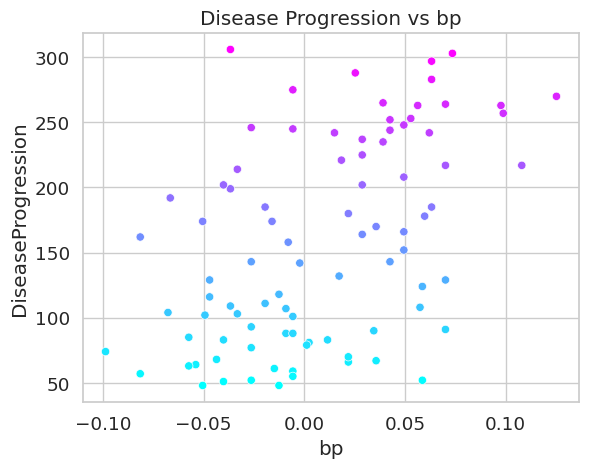

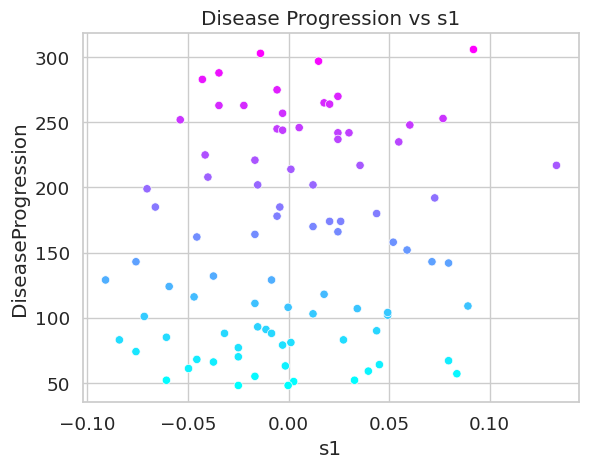

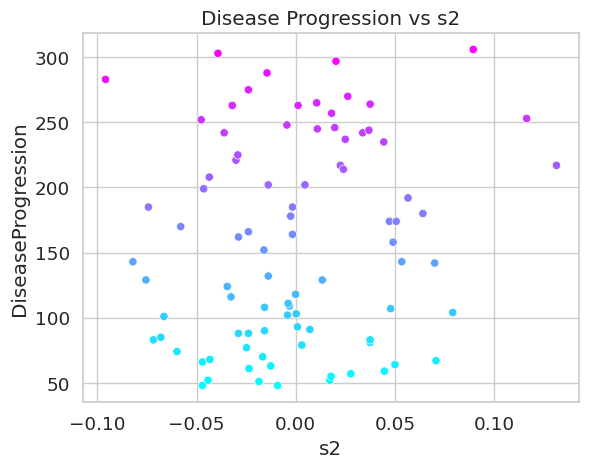

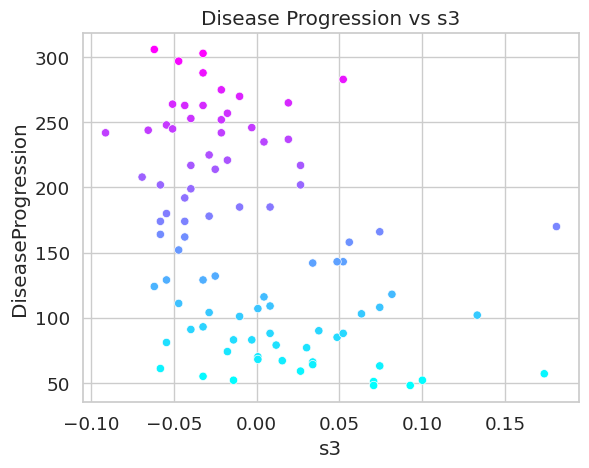

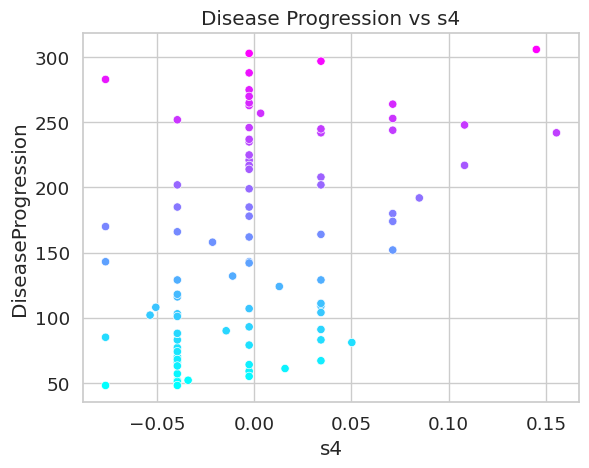

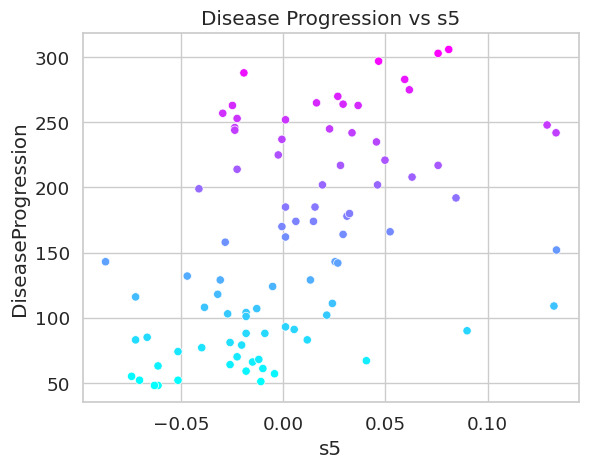

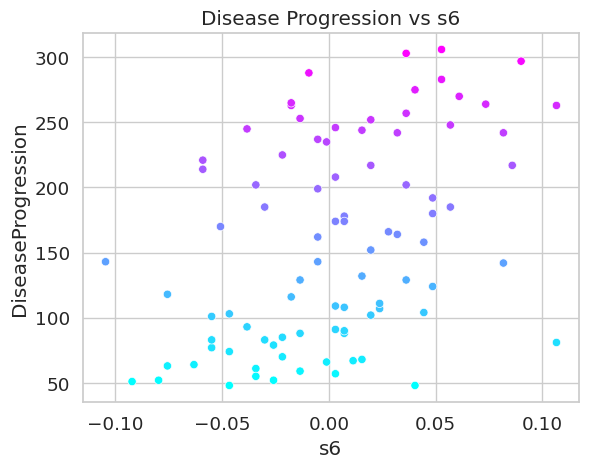

Training shape: (353, 10)
Testing shape: (89, 10)
Feature Coefficients:
       age: -67.16308558372036
       sex: -244.04569990260228
       bmi: 509.1563646806624
        bp: 305.7066509099907
        s1: -449.7224654546235
        s2: 217.82622155799305
        s3: -49.52742565861975
        s4: 56.39295109581896
        s5: 663.2503534243518
        s6: 82.20307496397149
Intercept: 152.88437994403927
First 5 predicitions: [116.0566433   82.3085256  160.86715899 189.18169509  75.32179675]
First 5 actuals: [ 79.  55. 109. 178.  39.]


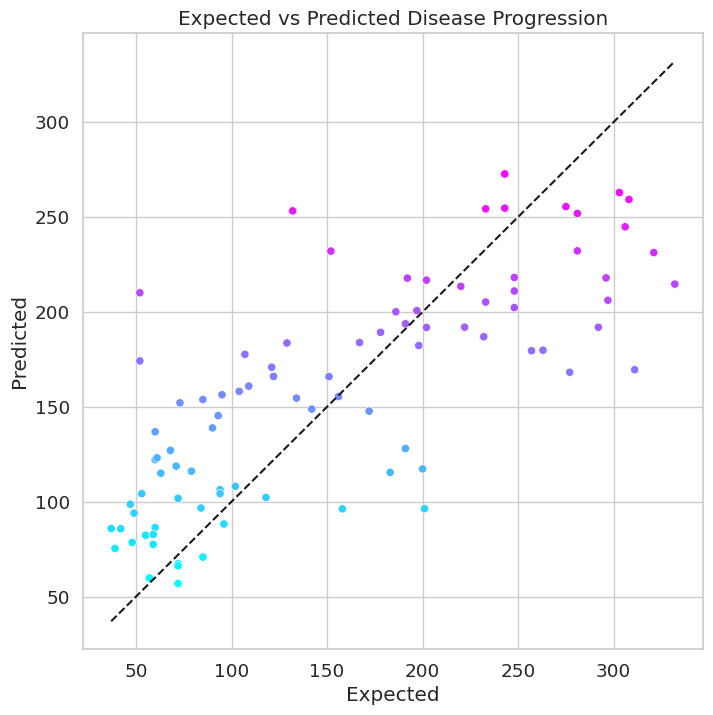

R^2 Score: 0.577
Mean Squared Error: 3212.595
LinearRegression: mean R² = 0.475
      ElasticNet: mean R² = -0.002
           Lasso: mean R² = 0.339
           Ridge: mean R² = 0.421


In [10]:
# import all the libraries we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

# set the plot style for our data
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', None)

# Step 1: Load the diabetes dataset we were given
diabetes = load_diabetes()

# Make DataFrame
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['DiseaseProgression'] = diabetes.target

print (diabetes_df.head())
print (diabetes_df.describe())

# Step 2: Vizualize Features
sample_df= diabetes_df.sample(frac=0.2, random_state=17)

for feature in diabetes.feature_names:
    sns.scatterplot(data=sample_df, x=feature, y='DiseaseProgression', hue='DiseaseProgression', palette='cool', legend=False)
    plt.title(f'Disease Progression vs {feature}')
    plt.show()

# Step 3: Split Data for Training and Testing
x= diabetes.data
y= diabetes.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=11)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

# Step 4: Train the Model
linear_regression=LinearRegression()
linear_regression.fit(x_train, y_train)

print ("Feature Coefficients:")
for i, name in enumerate(diabetes.feature_names):
    print (f'{name:>10}: {linear_regression.coef_[i]}')

print (f'Intercept: {linear_regression.intercept_}')

# Step 5: Make Predictions
y_pred= linear_regression.predict(x_test)

print("First 5 predicitions:", y_pred[:5])
print("First 5 actuals:", y_test[:5])

# Step 6: Vizualize
df_plot= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted', hue='Predicted', palette='cool', legend=False)

start = min(y_test.min(), y_pred.min())
end = max(y_test.max(), y_pred.max())
plt.plot([start, end], [start, end], 'k--')
plt.title('Expected vs Predicted Disease Progression')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

# Step 7: Evaluate the Model
r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)


print(f'R^2 Score: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')

# Step 8 Compare With Others
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}
X = diabetes_df.drop("DiseaseProgression", axis=1)
y = diabetes_df["DiseaseProgression"]
for name, estimator in estimators.items():
    kfold = KFold(n_splits=10, shuffle=True, random_state=11)
    scores = cross_val_score(estimator, X, y, cv=kfold, scoring='r2')
    print(f'{name:>16}: mean R² = {scores.mean():.3f}')